In [69]:
import numpy as np
import pickle
import pathlib
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

import os
from os.path import join
path_to_file = str(pathlib.Path().resolve())
dir_path = join(path_to_file, "../../")
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(join(dir_path, "HelperFiles"))
from load_data import *


## SHAP Results

In [ ]:

# alpha = 0.2
# # alpha = 0.1

# # guarantee = "rank"
# guarantee = "set"

datasets = ["census", "bank", "brca", "credit", "breast_cancer"]
Ks = [2,5]
# method = "rankshap"
# method = "sprtshap"
for method in ["rankshap", "sprtshap"]:
    for guarantee in ["rank", "set"]:
        for alpha in [0.1, 0.2]:
            max_mat = np.empty((len(Ks), len(datasets)))
            data_dir = join(dir_path, "Experiments", "Results", "Top_K", guarantee, "alpha_"+str(alpha))
            for i, K in enumerate(Ks):
                for j, dataset in enumerate(datasets):
                    max_mat[i,j] = np.nan
                    fname = method + "_" + dataset + "_K" + str(K) 
                    path = join(data_dir, fname)
                    if os.path.exists(path):
                        with open(path, "rb") as fp:
                            results = pickle.load(fp)
                        fwers = results['fwers']
                        if len(fwers)==30:
                            # Paper table used FWERs from < 30 runs
                            avg_fwer = np.mean(fwers)
                            max_fwer = np.max(fwers)
                            max_mat[i, j] = np.round(max_fwer*100, 1)
                        else:
                            print(f"Only ran on {len(fwers)} inputs: ", fname, guarantee, alpha)
                    else:
                        print("File not found: ", fname)
            print("#"*20)
            print("Method: ", method, "\tGuarantee: ", guarantee, "\tAlpha: ", alpha)

            # print("Average FWER (%)")
            # print(avg_mat)
            print("Max FWER (%)")
            print(max_mat)
            # print("Proportion of FWERs below alpha")
            # print(control_mat)

File not found:  rankshap_breast_cancer_K5
####################
Method:  rankshap 	Guarantee:  rank 	Alpha:  0.1
Max FWER (%)
[[ 6.  6.  2.  4.  0.]
 [ 0.  0.  0.  0. nan]]
File not found:  rankshap_breast_cancer_K5
####################
Method:  rankshap 	Guarantee:  rank 	Alpha:  0.2
Max FWER (%)
[[18. 18.  0.  2.  2.]
 [ 0.  0.  0.  0. nan]]
####################
Method:  rankshap 	Guarantee:  set 	Alpha:  0.1
Max FWER (%)
[[2. 0. 6. 0. 0.]
 [0. 0. 0. 2. 0.]]
####################
Method:  rankshap 	Guarantee:  set 	Alpha:  0.2
Max FWER (%)
[[16.  0.  6.  0.  6.]
 [ 4.  2. 14.  4.  0.]]
File not found:  sprtshap_bank_K5
File not found:  sprtshap_credit_K5
####################
Method:  sprtshap 	Guarantee:  rank 	Alpha:  0.1
Max FWER (%)
[[ 0.  0.  0.  0.  0.]
 [ 0. nan  0. nan  0.]]
File not found:  sprtshap_bank_K5
File not found:  sprtshap_credit_K5
####################
Method:  sprtshap 	Guarantee:  rank 	Alpha:  0.2
Max FWER (%)
[[ 0.  0.  0.  0.  0.]
 [ 0. nan  0. nan  0.]]
######

In [63]:
method = "rankshap"
dataset = "breast_cancer"
K = 2
guarantee = "rank"
alpha = 0.2
fname = method + "_" + dataset + "_K" + str(K) 
data_dir = join(dir_path, "Experiments", "Results", "Top_K", guarantee, "alpha_"+str(alpha))
path = join(data_dir, fname)
with open(path, "rb") as fp:
    results = pickle.load(fp)
fwers = results['fwers']
len(fwers)


13

## LIME Results

In [4]:
method = "lime"
guarantee = "rank"
for alpha in [0.1, 0.2]:
    avg_mat = np.empty((len(Ks), len(datasets)))
    control_mat = np.empty((len(Ks), len(datasets)))
    max_mat = np.empty((len(Ks), len(datasets)))
    data_dir = join(dir_path, "Experiments", "Results", "Top_K", guarantee, "alpha_"+str(alpha))
    for i, K in enumerate(Ks):
        for j, dataset in enumerate(datasets):
            avg_mat[i, j] = np.nan
            control_mat[i, j] = np.nan
            max_mat[i,j] = np.nan
            fname = method + "_" + dataset + "_K" + str(K) 
            path = join(data_dir, fname)
            if os.path.exists(path):
                with open(path, "rb") as fp:
                    results = pickle.load(fp)
                fwers = results['fwers']
                avg_fwer = np.mean(fwers)
                max_fwer = np.max(fwers)
                max_mat[i, j] = np.round(max_fwer*100, 1)
                avg_mat[i, j] = np.round(avg_fwer*100, 1)

    print("#"*20)
    print("Method: LIME", "\tAlpha: ", alpha)

    print("Max FWER (%)")
    print(max_mat)

    # print("Avg FWER (%)")
    # print(avg_mat)


####################
Method: LIME 	Alpha:  0.1
Max FWER (%)
[[0. 0. 2. 4. 0.]
 [0. 0. 0. 0. 0.]]
####################
Method: LIME 	Alpha:  0.2
Max FWER (%)
[[0. 0. 2. 4. 0.]
 [0. 0. 0. 0. 0.]]


In [5]:
dataset = "brca"
K = "2"
fname = method + "_" + dataset + "_K" + str(K) 
path = join(data_dir, fname)
if os.path.exists(path):
    with open(path, "rb") as fp:
        results = pickle.load(fp)
    fwers = results['fwers']
    print(fwers)

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.   0.   0.
 0.   0.  ]


## Number of samples

In [54]:
alpha = 0.1
guarantee = "rank"
K = 2

shap_n_samples, shap_q1, shap_q3 = [], [], []
datasets = ["census", "bank", "brca", "credit", "breast_cancer"]

methods = ['rankshap', 'sprtshap']
for method in methods:
    samples_med, samples_q1, samples_q3 = [], [], []
    data_dir = join(dir_path, "Experiments", "Results", "Top_K", guarantee, "alpha_"+str(alpha))
    for j, dataset in enumerate(datasets):
        fname = method + "_" + dataset + "_K" + str(K) 
        path = join(data_dir, fname)
        if os.path.exists(path):
            with open(path, "rb") as fp:
                results = pickle.load(fp)
            samples = results['N_samples']
            if samples.shape[0]==30:
                samples_med.append(np.median(samples).item())
                samples_q1.append(np.quantile(samples, 0.25).item())
                samples_q3.append(np.quantile(samples, 0.75).item())
            else:
                print(fname)
                samples_med.append(np.nan)
                samples_q1.append(np.nan)
                samples_q3.append(np.nan)
    print(samples_med)
    print(samples_q1)
    print("#"*10)
    shap_n_samples.append(samples_med)
    shap_q1.append(samples_q1)
    shap_q3.append(samples_q3)

shap_n_samples = np.array(shap_n_samples)
samples_q1 = np.array(samples_q1)
shap_q3 = np.array(shap_q3)

rankshap_breast_cancer_K2
[1400.0, 1600.0, 2200.0, 2000.0, nan]
[1200.0, 1600.0, 2000.0, 2000.0, nan]
##########
sprtshap_brca_K2
[2000.0, 2000.0, nan, 2000.0, 3000.0]
[1000.0, 1000.0, nan, 1000.0, 1000.0]
##########


In [55]:
# method = "sprtshap"
# dataset = "brca"
# K = 2
# fname = method + "_" + dataset + "_K" + str(K) 
# path = join(data_dir, fname)
# if os.path.exists(path):
#     with open(path, "rb") as fp:
#         results = pickle.load(fp)
#     samples = results['N_samples']
#     print(samples.shape)
#     # if samples.shape[0]==30:
#     print(np.median(samples))
#     print(np.quantile(samples, 0.25))
#     print(np.quantile(samples, 0.75))


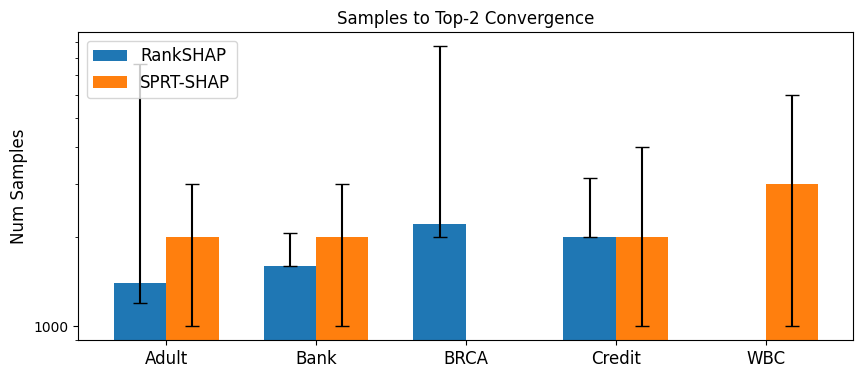

In [56]:
bar_width = 0.35
dataNames = ["Adult", "Bank", "BRCA", "Credit", "WBC"]
methodNames = ["RankSHAP", "SPRT-SHAP"]

# Index array for each group
index = np.arange(5)

# Plotting
fig, ax = plt.subplots(figsize=(10,4))

# Plotting bars for each row
for i in range(2):
    ax.bar(index + i * bar_width, shap_n_samples[i], bar_width, label=methodNames[i])
    ax.errorbar(index + i * bar_width, shap_n_samples[i], yerr=(shap_n_samples[i]-shap_q1[i], shap_q3[i]-shap_n_samples[i]), color="black", ls="none", capsize=5)

# Adding labels
ax.set_ylabel('Num Samples', fontsize="large")
ax.set_title('Samples to Top-2 Convergence', fontsize="large")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(dataNames, fontsize="large")
ax.set_yscale('log')

ax.yaxis.set_major_formatter(ScalarFormatter())

ax.legend(fontsize="large")
# plt.savefig(join(dir_path, "Experiments", "Figures", "n_samples_vs_kshap.png"), bbox_inches="tight")
plt.show()



In [52]:
good_idx = np.where(~np.isnan(shap_n_samples).any(axis=0))[0]
dataNames_clean = np.array(dataNames)[good_idx]
shap_n_samples_clean = np.array(shap_n_samples)[:, good_idx]
shap_q1_clean = np.array(shap_q1)[:, good_idx]
shap_q3_clean = np.array(shap_q3)[:, good_idx]

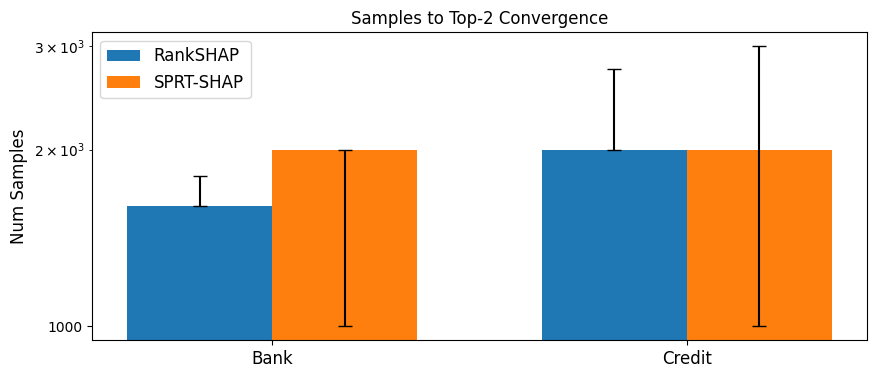

In [53]:
bar_width = 0.35
methodNames = ["RankSHAP", "SPRT-SHAP"]

# Index array for each group
index = np.arange(len(dataNames_clean))

# Plotting
fig, ax = plt.subplots(figsize=(10,4))

# Plotting bars for each row
for i in range(2):
    ax.bar(index + i * bar_width, shap_n_samples_clean[i], bar_width, label=methodNames[i])
    ax.errorbar(index + i * bar_width, shap_n_samples_clean[i], yerr=(shap_n_samples_clean[i]-shap_q1_clean[i], shap_q3_clean[i]-shap_n_samples_clean[i]), color="black", ls="none", capsize=5)

# Adding labels
ax.set_ylabel('Num Samples', fontsize="large")
ax.set_title('Samples to Top-2 Convergence', fontsize="large")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(dataNames_clean, fontsize="large")
ax.set_yscale('log')

ax.yaxis.set_major_formatter(ScalarFormatter())

ax.legend(fontsize="large")
# plt.savefig(join(dir_path, "Experiments", "Figures", "n_samples_vs_kshap.png"), bbox_inches="tight")
plt.show()

